<a href="https://colab.research.google.com/github/Fairooz14/Image_Processing/blob/main/IP_lab_03_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 03 and 04 : Filtering and Histogram**

Image filtering modifies pixel values based on a kernel (convolution matrix) to achieve desired effects:
- *Smoothing*: Reduces noise and blurs the image by averaging pixel values with neighbors (e.g., Gaussian blur).
- *Sharpening*: Enhances edges and details by emphasizing differences between pixel values (e.g., unsharp masking).

These techniques use convolution, where a kernel slides over the image, computing weighted sums of neighboring pixels.

## **Smoothing**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

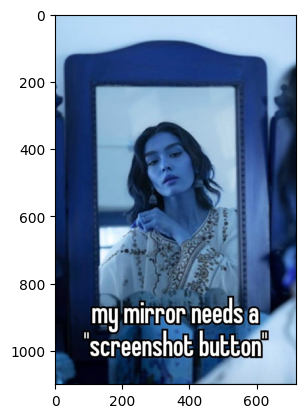

In [ ]:
image_bgr = cv2.imread('/content/sample.jpg')
plt.imshow(image_bgr)

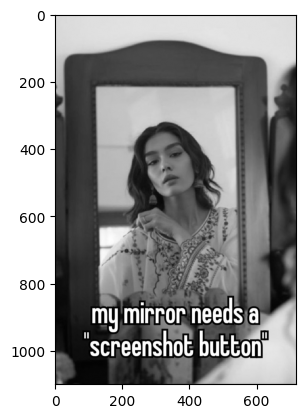

In [ ]:
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap='gray')

## **Smoothing Filter ( Gaussian )**

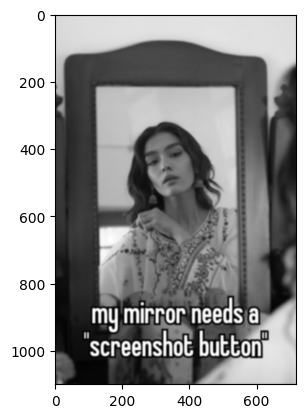

In [ ]:
gaussian_filter = cv2.GaussianBlur(image_gray, (9, 9), 0)
plt.imshow(gaussian_filter, cmap='gray')


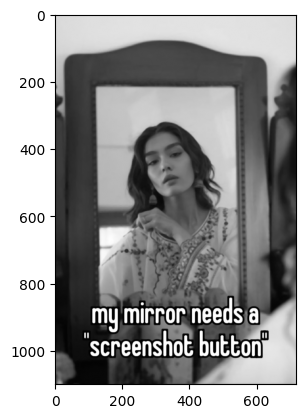

In [ ]:
median = cv2.medianBlur(image_gray, 5)
plt.imshow(median, cmap='gray')

## **Sharping Filter**

In [ ]:
sharpening_kernel = np.array([[-1, -1, -1],
                             [-1, 9, -1],
                             [-1, -1, -1]])
sharpened_image = cv2.filter2D(image_bgr, -1, sharpening_kernel)

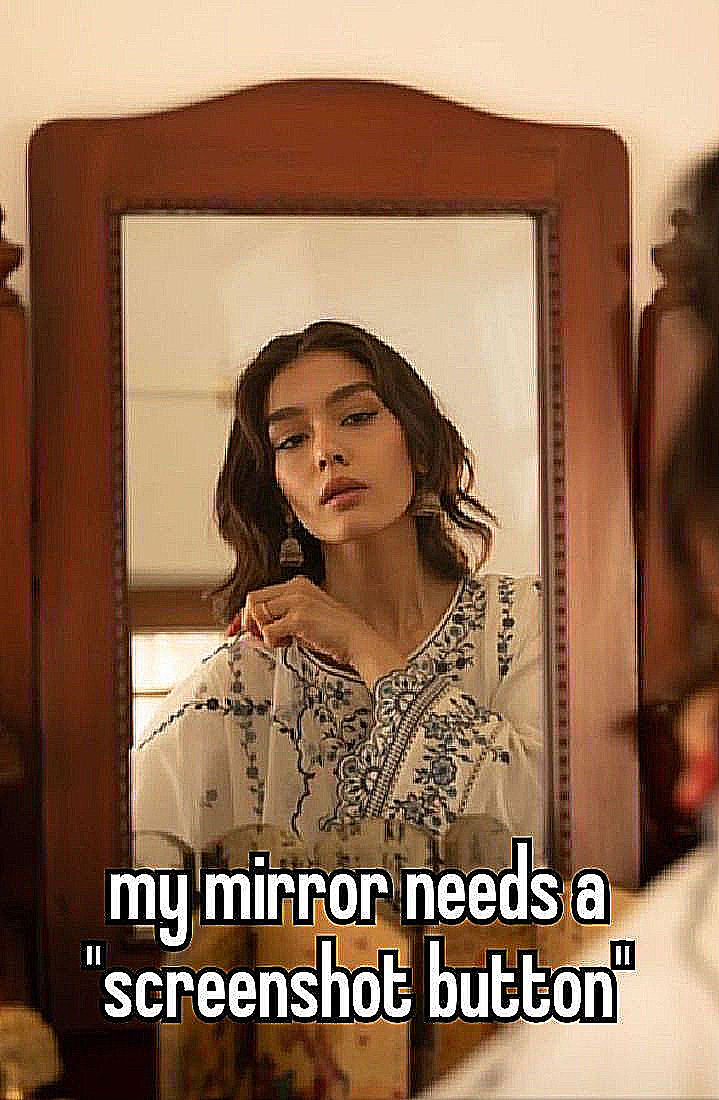

In [ ]:
cv2_imshow(sharpened_image)

## **Histogram**

sharping image histogram

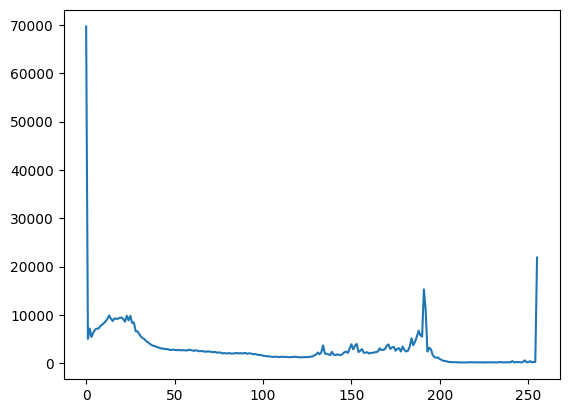

In [ ]:
hist = cv2.calcHist([sharpened_image], [0], None, [256], [0, 256])
plt.plot(hist)

Histogram Equalization possible on grayscale image only

In [ ]:
# Convert the sharpened_image to grayscale before applying histogram equalization
gray_sharpened_image = cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2GRAY)

# Now apply histogram equalization to the grayscale image
equ = cv2.equalizeHist(gray_sharpened_image)

In [ ]:
# equ = cv2.equalizeHist()


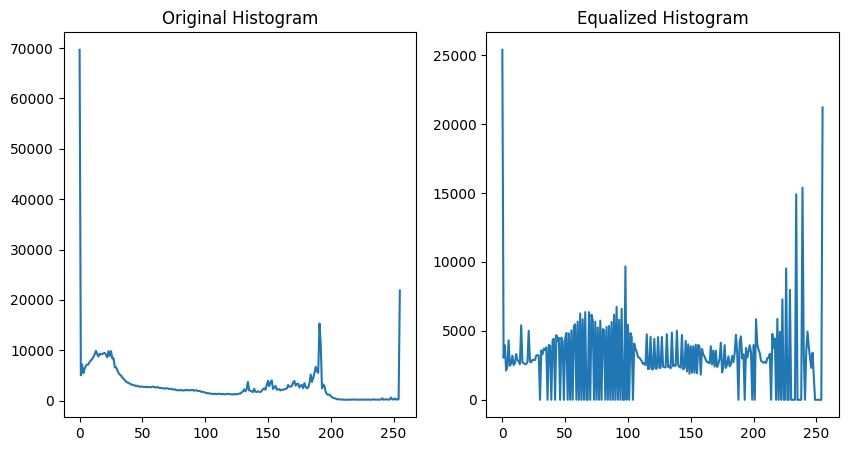

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(hist)
plt.title('Original Histogram')
plt.subplot(1,2,2)
plt.plot(cv2.calcHist([equ], [0], None, [256], [0, 256]))
plt.title('Equalized Histogram')
plt.show()